Clone and Build Darknet
- clone darknet repo (AlexeyAB)
- change makefile to have GPU and OPENCV enabled 
- make darknet

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 24.62 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [2]:
# change makefile settings to enable GPU and OPENCV
%cd darknet 
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile


/content/darknet


In [3]:
# CUDA verification
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet
!make 

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

Define helper functions 

In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline 

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files 
  uploaded = files.upload()
  for name, data in uploaded.items():
    f.write(data)
    print('saved file', name)

def download(path):
  from google.colab import files 
  files.download(path)

Set up google drive

In [6]:
%cd .. 
from google.colab import drive 
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# link created, /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'AI4Good Lab CV.pdf'
'A. Snyder Solomons-Organic Chemistry 12th (1).pdf'
'A. Snyder Solomons-Organic Chemistry 12th.pdf'
'Calculus Recopied Notes.gdoc'
 Cegep
'Colab Notebooks'
'CV_Miiyu_Fujita (1).pdf'
 CV_Miiyu_Fujita.pdf
'CV U1.pdf'
 レインぼうやのかくれんぼ　たて.docx
"Facture l'eau et le riz pour Gen no tomo"
 final_results_yolov3
 レインぼうやのかくれんぼ　たて.gdoc
 Internships
 Intruder_Detection.ipynb
'James Stewart Single Variable Calculus - Early Transcendentals 8th Edition.pdf.pdf'
 lol.gslides
'MariTurnup (Guest List).gsheet'
'MATH263 slides'
 Miiyu_Fujita_CV.pdf
'nexted FXML files.gdoc'
'Paganini vs Liszt comparison.gdoc'
'Page 1 2020-03-30 - 11-29.jpg'
 Physics_for_Scientists_and_Engineers_-_A.pdf
 Retirement
'Screen Shot 2021-01-17 at 6.56.25 PM.png'
 Solution_manual_for_introduction_to_electric_circuits_6th_edition.gdoc
 University
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document (4).gdoc'
'Untitled document (5).gdoc'
'Untitled document.g

In [8]:
%cd darknet 

/content/darknet


Training Stage - Custom YOLOv3 Object Detector

- upload custom dataset into Cloud

In [ ]:
# check where dataset is stored (zip file)
!ls /mydrive/final_results_yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [13]:
# copy .zip file into root directory of cloud VM
!cp /mydrive/final_results_yolov3/obj.zip ../

# unzip file (located in /darknet/data/obj)
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/dcc8ea53ebd1c0db.txt  
  inflating: data/obj/96a25cf5867bae4a.txt  
  inflating: data/obj/f555ea75bce89b64.jpg  
  inflating: data/obj/95d5bc4bea720c50.txt  
  inflating: data/obj/1e3a6861a7fb70c1.jpg  
  inflating: data/obj/772b30ec8826e69c.jpg  
  inflating: data/obj/bc275a6b8c302898.txt  
  inflating: data/obj/500301983a90478b.jpg  
  inflating: data/obj/df2e345debfd7d6a.jpg  
  inflating: data/obj/8bce46054ed4017e.jpg  
  inflating: data/obj/541d5e6f3e21f1b4.jpg  
  inflating: data/obj/638e58186f05b84d.txt  
  inflating: data/obj/45991f039e493d59.jpg  
  inflating: data/obj/265bd0d687648bfc.jpg  
  inflating: data/obj/c412b2e449250f75.txt  
  inflating: data/obj/77cba587f7341a29.jpg  
  inflating: data/obj/ea36e1d07cef3f2a.txt  
  inflating: data/obj/fbd3a983da35fa67.txt  
  inflating: data/obj/05b773a2e2f09a4b.jpg  
  inflating: data/obj/0002ae796e1f8eb5.jpg  
  inflating: data/obj/a66b2df79015fe24.jpg  
  inflating

- configure files for training 

a) cfg file 

In [ ]:
# copy yolov3.cfg to edit 
!cp cfg/yolov3.cfg /mydrive/final_results_yolov3/yolov3_custom2.cfg

# edit cfg file in a separate text editor 

In [9]:
# upload custom .cfg back into cloud VM 
!cp /mydrive/final_results_yolov3/yolov3_custom.cfg ./cfg

b) obj.names and obj.data

In [10]:
# create new files obj.names and obj.data in a separate text editor

# upload obj.names and obj.data files to cloudVM from drive 

!cp /mydrive/final_results_yolov3/obj.names ./data 
!cp /mydrive/final_results_yolov3/obj.data ./data 

c) generate train.txt 

train.txt will hold all paths to our training images 

In [11]:
# upload generate_train.py script to cloud VM from google drive 
!cp /mydrive/final_results_yolov3/generate_train.py ./

In [14]:
# run python script

!python generate_train.py

In [15]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj		     person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.data	     scream.jpg
coco.names  goal.txt	 labels			   obj.names	     train.txt
dog.jpg     horses.jpg	 __MACOSX		   openimages.names  voc.names


Download pre-trained weights for convolutional layers 

- this will help the object detector be more accurate and require less training time. Helps the model converge faster 

In [16]:
# upload pretrained convolutional layer weights 

!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-03-20 13:55:11--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-03-20 13:55:11--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  81.9MB/s    in 1.9s    

2021-03-20 13:55:13 (81.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



Train custom object detector 

In [ ]:
# train custom detector 

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.002788, iou_loss = 0.000000, total_loss = 0.002788 
 total_bbox = 789570, rewritten_bbox = 0.701141 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.857318), count: 3, class_loss = 0.000944, iou_loss = 0.050693, total_loss = 0.051637 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.737591), count: 4, class_loss = 0.410194, iou_loss = 0.300522, total_loss = 0.710716 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.619726), count: 17, class_loss = 3.151533, iou_loss = 2.404782, total_loss = 5.556315 
 total_bbox = 789594, rewritten_bbox = 0.701120 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.830592), count: 4, class_loss = 0.247570, iou_loss = 0.110408, total_loss = 0.357978 
v3 (

In [17]:
# if runtime crashes, use backed up weights to pick up training where you left off 

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/final_results_yolov3/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Short

Run Custom Object Detector 

In [18]:
# set custom cfg to test mode 

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

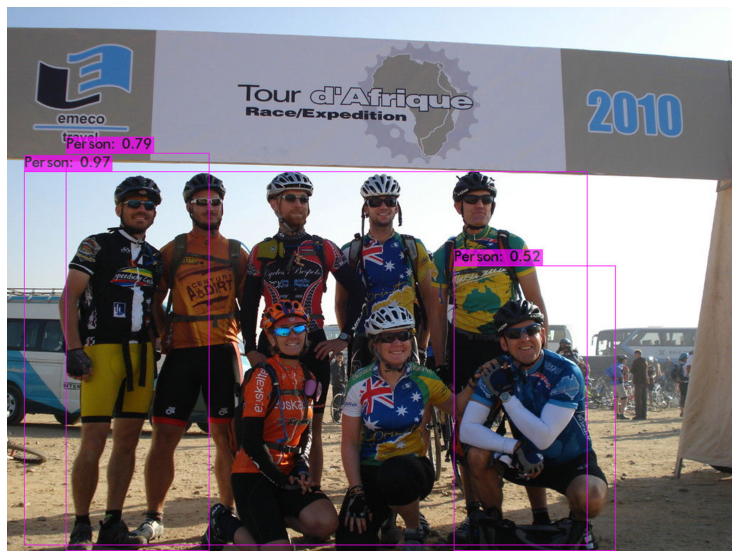

In [21]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/final_results_yolov3/backup/yolov3_custom_last.weights /mydrive/final_results_yolov3/images/bikers.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

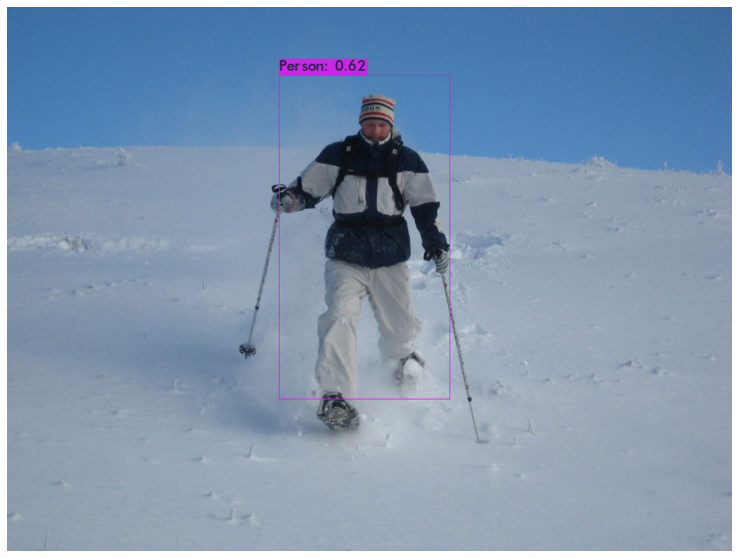

In [23]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/final_results_yolov3/backup/yolov3_custom_last.weights /mydrive/final_results_yolov3/images/skii.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

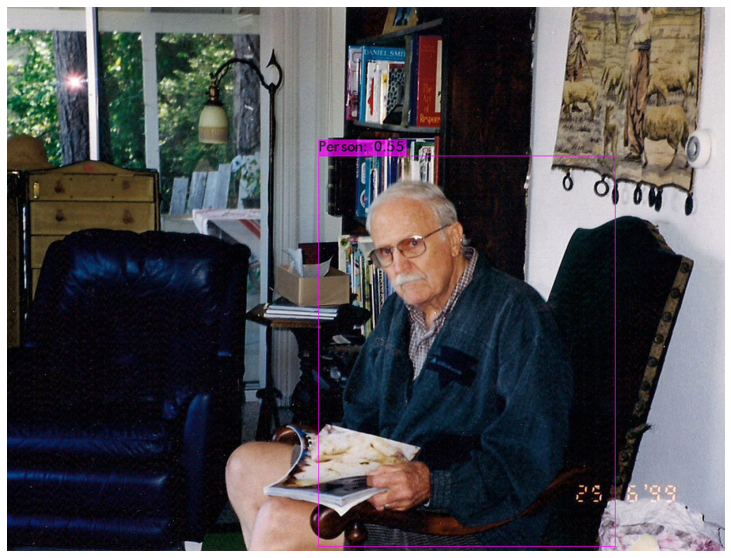

In [24]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/final_results_yolov3/backup/yolov3_custom_last.weights /mydrive/final_results_yolov3/images/books.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

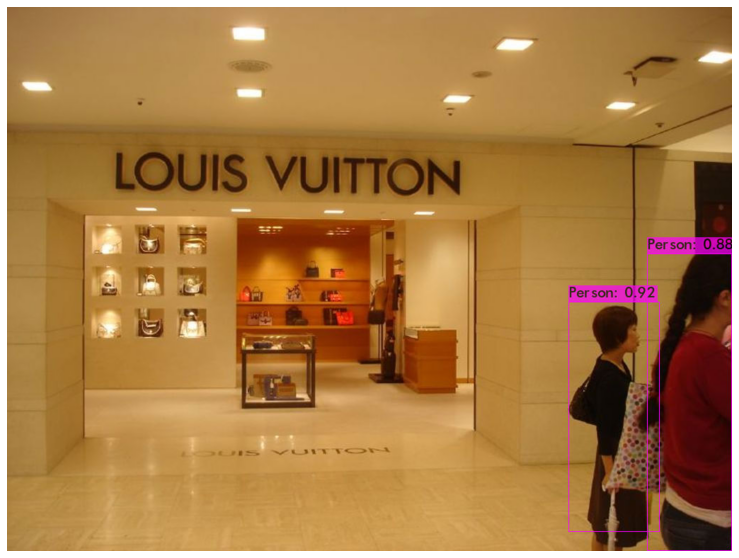

In [25]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/final_results_yolov3/backup/yolov3_custom_last.weights /mydrive/final_results_yolov3/images/LV.jpg -thresh 0.3
imShow('predictions.jpg')